# Nu Bank

Nu es un neobanco brasileño con sede en la ciudad de São Paulo, Brasil, donde es conocido como Nubank. Fundado en 2013, está considerado como el banco digital más grande del mundo fuera de Asia y es una de las empresas tecnofinanciera más grandes en América Latina. En 2019 fue reconocida como una de las empresas más innovadoras del mundo por la revista estadounidense Fast Company.
 
En seis años, Nubank se convirtió en el sexto banco más grande de Brasil, ubicándose entre los primeros cinco emisores de tarjetas de crédito y alcanzando la arca de 20 millones de clientes a principios de 2020. Entre mediados de 2018 y fines de 2019 (según un estudio de apptopia) su app fue descargada más veces que los tres neobancos más importantes de Europa tomados en conjunto.
 
<br>
<center><img src="https://imgur.com/97motmM.png"></center>
<br>

In [54]:
import pandas as pd
import numpy as np

In [55]:
url = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(url)

Una vez leído el csv, hemos creído conveniente eliminar algunas columnas porque tenías demasiados valores nulos como last amount borrowed o ok since.

La columna target default la convertimos a valores binarios (0 para False y 1 para True) para facilitar el modelado de la clasificación; también hemos eliminado las filas con valores nulos para asegurarnos que el conjunto de datos de entrenamiento era coherente.

Por último hemos identificado las columnas score1 y score2 y las hemos convertido en valores numéricos.

In [56]:
df.head()

ids target_default  \
0  343b7e7b-2cf8-e508-b8fd-0a0285af30aa          False   
1  bc2c7502-bbad-0f8c-39c3-94e881967124          False   
2  669630dd-2e6a-0396-84bf-455e5009c922           True   
3  d235609e-b6cb-0ccc-a329-d4f12e7ebdc1          False   
4  9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b          False   

                    score_1                   score_2  score_3     score_4  \
0  1Rk8w4Ucd5yR3KcqZzLdow==  IOVu8au3ISbo6+zmfnYwMg==    350.0  101.800832   
1  DGCQep2AE5QRkNCshIAlFQ==  SaamrHMo23l/3TwXOWgVzw==    370.0   97.062615   
2  DGCQep2AE5QRkNCshIAlFQ==  Fv28Bz0YRTVAT5kl1bAV6g==    360.0  100.027073   
3  1Rk8w4Ucd5yR3KcqZzLdow==  dCm9hFKfdRm7ej3jW+gyxw==    510.0  101.599485   
4  8k8UDR4Yx0qasAjkGrUZLw==  +CxEO4w7jv3QPI/BQbyqAA==    500.0   98.474289   

    score_5     score_6  risk_rate  last_amount_borrowed  \
0  0.259555  108.427273       0.40              25033.92   
1  0.942655   92.002546       0.24                   NaN   
2  0.351918  112.892453       0.29               7207.92   
3  0.987673   94.902491       0.32                   NaN   
4  0.532539  118.126207       0.18                   NaN   

   last_borrowed_in_months  credit_limit  \
0                     36.0           0.0   
1                      NaN       39726.0   
2                     36.0           NaN   
3                      NaN       54591.0   
4                      NaN           NaN   

                                              reason     income  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   65014.12   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...  100018.91   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   65023.65   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   68830.01   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   60011.29   

  facebook_profile                     state                       zip  \
0             True  sjJbkqJS7cXalHLBFA+EOQ==  Ernn+uVXCMq/6ARrBCcd+A==   
1            False  xsd3ZdsI3356I3xMxZeiqQ==  rlWIXTBO+VOa34+SpGyhlQ==   
2              NaN  Ygq6MsM98oC8yceExr69Ig==  PjTIDfJsK0DKL9fO7vuW2g==   
3            False  KET/Pmr6rHp1RJ/P9ymztw==  Cc/kWDLQH3dpHv5HU+pLVA==   
4             True  xsd3ZdsI3356I3xMxZeiqQ==  i036nmJ7rfxo+3EvCD7Jnw==   

                    channel  \
0  NCqL3QBx0pscDnx3ixKwXg==   
1  NCqL3QBx0pscDnx3ixKwXg==   
2  NCqL3QBx0pscDnx3ixKwXg==   
3  NCqL3QBx0pscDnx3ixKwXg==   
4  NCqL3QBx0pscDnx3ixKwXg==   

                                            job_name  \
0  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
1  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
2  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   
3  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...   
4  mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...   

                 real_state  ok_since  n_bankruptcies  n_defaulted_loans  \
0  N5/CE7lSkAfB04hVFFwllw==       NaN             0.0                0.0   
1  N5/CE7lSkAfB04hVFFwllw==      50.0             0.0                0.0   
2  n+xK9CfX0bCn77lClTWviw==       NaN             0.0                0.0   
3  n+xK9CfX0bCn77lClTWviw==       NaN             1.0                0.0   
4  n+xK9CfX0bCn77lClTWviw==       NaN             0.0                0.0   

   n_accounts  n_issues application_time_applied  application_time_in_funnel  \
0        18.0      18.0                 07:52:34                         444   
1        14.0      14.0                 02:34:29                         346   
2        10.0       NaN                 00:60:02                           6   
3        19.0      19.0                 11:20:49                         406   
4        11.0       NaN                 13:39:03                         240   

         email  external_data_provider_credit_checks_last_2_year  \
0  outlook.com                                               NaN   
1    gmail.com                                               0.0   
2    gmail.com                                               NaN   
3    spgov

In [57]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [58]:
# Chequear los valores únicos por columna
print(f'\nValores únicos (por columna)\n{df.nunique().sort_values()}')


Valores únicos (por columna)
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                  

Una vez leído el csv, se ha creído conveniente eliminar algunas columnas porque tenían demasiados valores nulos como last amount borrowed o ok since.

La columna target default se ha convertido a valores binarios (0 para False y 1 para True) para facilitar el modelado de la clasificación; también se han eliminado las filas con valores nulos para asegurar que el conjunto de datos de entrenamiento era coherente.

Por último se han identificado las columnas score1 y score2 y se han convertido en valores numéricos.

In [59]:
#Excluímos columnas que no son útiles para el modelo, como el numero del telefono, e-mail , latitud y longitud.

df = df.drop(columns=['shipping_zip_code', 'external_data_provider_email_seen_before','application_time_in_funnel','ok_since','user_agent','profile_tags','shipping_zip_code','profile_phone_number','lat_lon','email','application_time_applied','ids','reason','facebook_profile','zip','channel','external_data_provider_first_name','shipping_state'])

In [60]:
# En las columnas numéricas con valores nulos, se reemplazan por 0
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna('0')

In [61]:
df.isnull().sum() *100 / len(df)

target_default                                       7.242222
score_1                                              1.248889
score_2                                              1.248889
score_3                                              0.000000
score_4                                              0.000000
score_5                                              0.000000
score_6                                              0.000000
risk_rate                                            0.000000
last_amount_borrowed                                 0.000000
last_borrowed_in_months                              0.000000
credit_limit                                         0.000000
income                                               0.000000
state                                                1.248889
job_name                                             7.413333
real_state                                           1.248889
n_bankruptcies                                       0.000000
n_defaul

<Axes: >

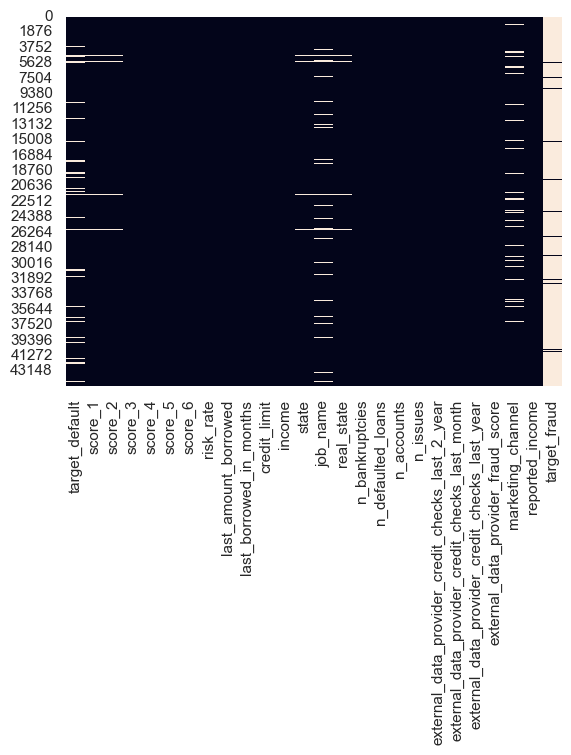

In [62]:
# Graficamos valores nulos
import seaborn as sns
sns.set(style="white")
sns.heatmap(df.isnull(), cbar=False)

##### Consultamos los valores de algunas columnas para ver si hay valores atípicos y si es necesario hacer un tratamiento de los datos

In [63]:
df['target_fraud'].unique()

array([nan, 'fraud_friends_family', 'fraud_id'], dtype=object)

In [64]:
df['marketing_channel'].unique()

array(['Invite-email', 'Radio-commercial', 'Waiting-list', 'Website',
       'Twitter', 'Facebook', nan, 'Instagram', 'Invite-web', 'LinkedIn'],
      dtype=object)

In [65]:
df['real_state'].unique()   

array(['N5/CE7lSkAfB04hVFFwllw==', 'n+xK9CfX0bCn77lClTWviw==',
       'nSpvDsIsslUaX6GE6m6eQA==', nan, 'UX7AdFYgQh+VrVC5eIaU9w==',
       '+qWF9pJpVGtTFn4vFjb/cg=='], dtype=object)

In [66]:
df['job_name'].unique() 

array(['mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfLWrCIHPaD/zvEtj9kpRfs=',
       'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh7sqoG606xwyrjmu0iDn/AP3T7j18BzP4d/RKHMMmoIk=',
       'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfffQUKytUTSlX4JIGctH6M=',
       ...,
       'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIUKB+aKyNM5HRAcLrWCFEaA=',
       'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh/BPIH2rQ7XdYBFgx67lJeKchufmBuNaLnB6EknlZxDw=',
       'mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhoeVO8bTYdGIcn11QWYM551r7w0NXeCOog6oC74ydxUI='],
      dtype=object)

In [67]:
df['state'].unique()

array(['sjJbkqJS7cXalHLBFA+EOQ==', 'xsd3ZdsI3356I3xMxZeiqQ==',
       'Ygq6MsM98oC8yceExr69Ig==', 'KET/Pmr6rHp1RJ/P9ymztw==',
       'JrdZzPZEa/YIIGwh8OdTKA==', 'orU7WJYGPT/xFwOXY1eBkw==',
       'P1TKs1aii8osbgO+MszZ2w==', '1DpYl6dtzY0qE33poow3iw==',
       '7bX4XFXmYqoMspxup0CrKA==', '1vMmtGURgMcjxQbV2KQiUw==',
       'BB/zpwTH+8GCIVHlhzOU1Q==', 'E8shyM/6btBNXXExsO17zw==',
       '/L8vvVesB5WyAv190Hw/rQ==', '/+QaZYcpPt5mXLpkv6I8Bw==',
       '82aTqSzrTImY+SbAOBQzGQ==', '0gQEZgRHqS5KSF3oWQrQfw==',
       'kfFcVGcsJmH2n3eYprLkeQ==', 'bNDXnbe7XAx/VUe+cbjDiw==',
       '5hPtRY8gW/3+fPXvGIgWTg==', '/EoxQEzy1PWWTtv6DNwr2w==',
       '0lQuvmygO68ZFXZjzHEOww==', '8ZKN5LHxobLWh6drCDlmhQ==',
       'x6Gw/1I8t3KPgT6s82Kodg==', 'OCoEDgPLpDjHcbEmPpAjvA==',
       'ZVfsutsd1Go0zZEnGp0vEA==', '1xxlFOWSFxK0/J2VdCKP3g==',
       '/78Q+NAqnsdbiE2JReYK9Q==', 'bwNrC22VlFOFk6/nEHQc6A==',
       'fR2lwAMjCb/fNXjsApiOTw==', 'rrVbgRNTRyB6auEycsRrpA==',
       'ygE7OTdsxRMLeXMa0EZwZw==', 'cd+7k16vaf6SzwSyvT/

In [68]:
df['target_default'].unique()

array([False, True, nan], dtype=object)

In [69]:
# como son pocas líneas con muchos valores nulos, se pueden eliminar, sin afectar el modelo.
df = df.dropna(subset=['target_default'])

In [70]:
#arrerglamos los valores nulos de las columnas que estudiamos
df['target_fraud'] = df['target_fraud'].fillna('NoInfo')
df['marketing_channel'] = df['marketing_channel'].fillna('NoInfo')
df['job_name'] = df['job_name'].fillna('NoInfo')

In [71]:
df.isnull().sum() *100 / len(df)

target_default                                      0.0
score_1                                             0.0
score_2                                             0.0
score_3                                             0.0
score_4                                             0.0
score_5                                             0.0
score_6                                             0.0
risk_rate                                           0.0
last_amount_borrowed                                0.0
last_borrowed_in_months                             0.0
credit_limit                                        0.0
income                                              0.0
state                                               0.0
job_name                                            0.0
real_state                                          0.0
n_bankruptcies                                      0.0
n_defaulted_loans                                   0.0
n_accounts                                      

<Axes: >

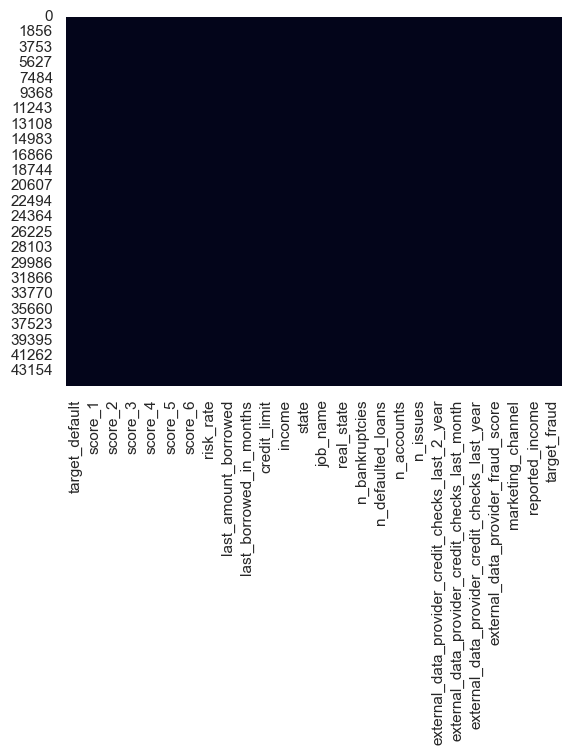

In [72]:
# Graficamos valores nulos después de la limpieza

sns.set(style="white")
sns.heatmap(df.isnull(), cbar=False)

In [73]:
df.describe()

c:\Users\User\OneDrive\A_Bootcamp\Bootcamp\.venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



score_4       score_5       score_6  \
count  41741.000000  41741.000000  41741.000000   
mean     100.006820      0.499416     99.919399   
std        3.183821      0.288085     10.022703   
min       86.191572      0.000035     60.663039   
25%       97.862546      0.251595     93.182517   
50%      100.017950      0.500174     99.977774   
75%      102.143100      0.747630    106.630991   
max      113.978234      0.999973    142.192400   

       external_data_provider_credit_checks_last_month  \
count                                     41741.000000   
mean                                          1.504396   
std                                           1.114207   
min                                           0.000000   
25%                                           1.000000   
50%                                           2.000000   
75%                                           2.000000   
max                                           3.000000   

       external_data_provider_fraud_score  reported_income  
count                        41741.000000          41741.0  
mean                           500.491771              inf  
std                            287.993121              NaN  
min                              0.000000            403.0  
25%                            252.000000          50910.0  
50%                            502.000000         101623.0  
75%                            747.000000         151248.0  
max                           1000.000000              inf

In [74]:
# Vemos que en reported_income hay valores infinitos, los cuales no tienen sentido, por lo que se procede a cambiarlos por 0
df['reported_income'] = df['reported_income'].replace([np.inf, -np.inf], 0)

In [75]:
#Hacemos un fit transform para normalizar los datos de las columnas numéricas

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

columns_target = ['last_amount_borrowed','reported_income','last_borrowed_in_months','credit_limit','income'] 
for col in columns_target:
    df[col] = scaler.fit_transform(df[[col]]) 

In [76]:
df_copy = df.copy()

In [77]:
#Tenemos columnas con valores mixtos pero estan encriptadas por el Banco, por lo que las transformamos a string para despues hacer un LabelEncoder.

for column in df.columns:
    if df[column].dtype == object or df[column].dtype == 'mixed':
        df[column] = df[column].astype(str)
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [78]:
df_copy_encoded = df.copy()

In [79]:
df.head()

target_default  score_1  score_2  score_3     score_4   score_5  \
0               0        0       10       28  101.800832  0.259555   
1               0        3       16       30   97.062615  0.942655   
2               1        3        9       29  100.027073  0.351918   
3               0        0       21       46  101.599485  0.987673   
4               0        2        1       45   98.474289  0.532539   

      score_6  risk_rate  last_amount_borrowed  last_borrowed_in_months  \
0  108.427273         39              2.627224                  1.11413   
1   92.002546         23             -0.577743                 -0.68792   
2  112.892453         28              0.345051                  1.11413   
3   94.902491         31             -0.577743                 -0.68792   
4  118.126207         17             -0.577743                 -0.68792   

   credit_limit    income  state  job_name  real_state  n_bankruptcies  \
0     -0.687279 -0.116075     44     25660           1               1   
1      0.487649  0.553756     47      3865           1               1   
2     -0.687279 -0.115893     32     25888           3               1   
3      0.927293 -0.043057     23        79           3               2   
4     -0.687279 -0.211806     47     24488           3               1   

   n_defaulted_loans  n_accounts  n_issues  \
0                  1          10        11   
1                  1           6         7   
2                  1           2         0   
3                  1          11        12   
4                  1           3         0   

   external_data_provider_credit_checks_last_2_year  \
0                                                 0   
1                                                 1   
2                                                 0   
3                                                 0   
4                                                 1   

   external_data_provider_credit_checks_last_month  \
0                                                2   
1                                                1   
2                                                2   
3                                                3   
4                                                2   

   external_data_provider_credit_checks_last_year  \
0                                               1   
1                                               1   
2                                               0   
3                                               0   
4                                               2   

   external_data_provider_fraud_score  marketing_channel  reported_income  \
0                                 645                  2        -0.040691   
1                                 243                  6        -0.040691   
2                                  65                  8        -0.040691   
3                                 815                  8        -0.040691   
4                                 320                  2        -0.040691   

   target_fraud  
0             0  
1             0  
2             0  
3             0  
4             0

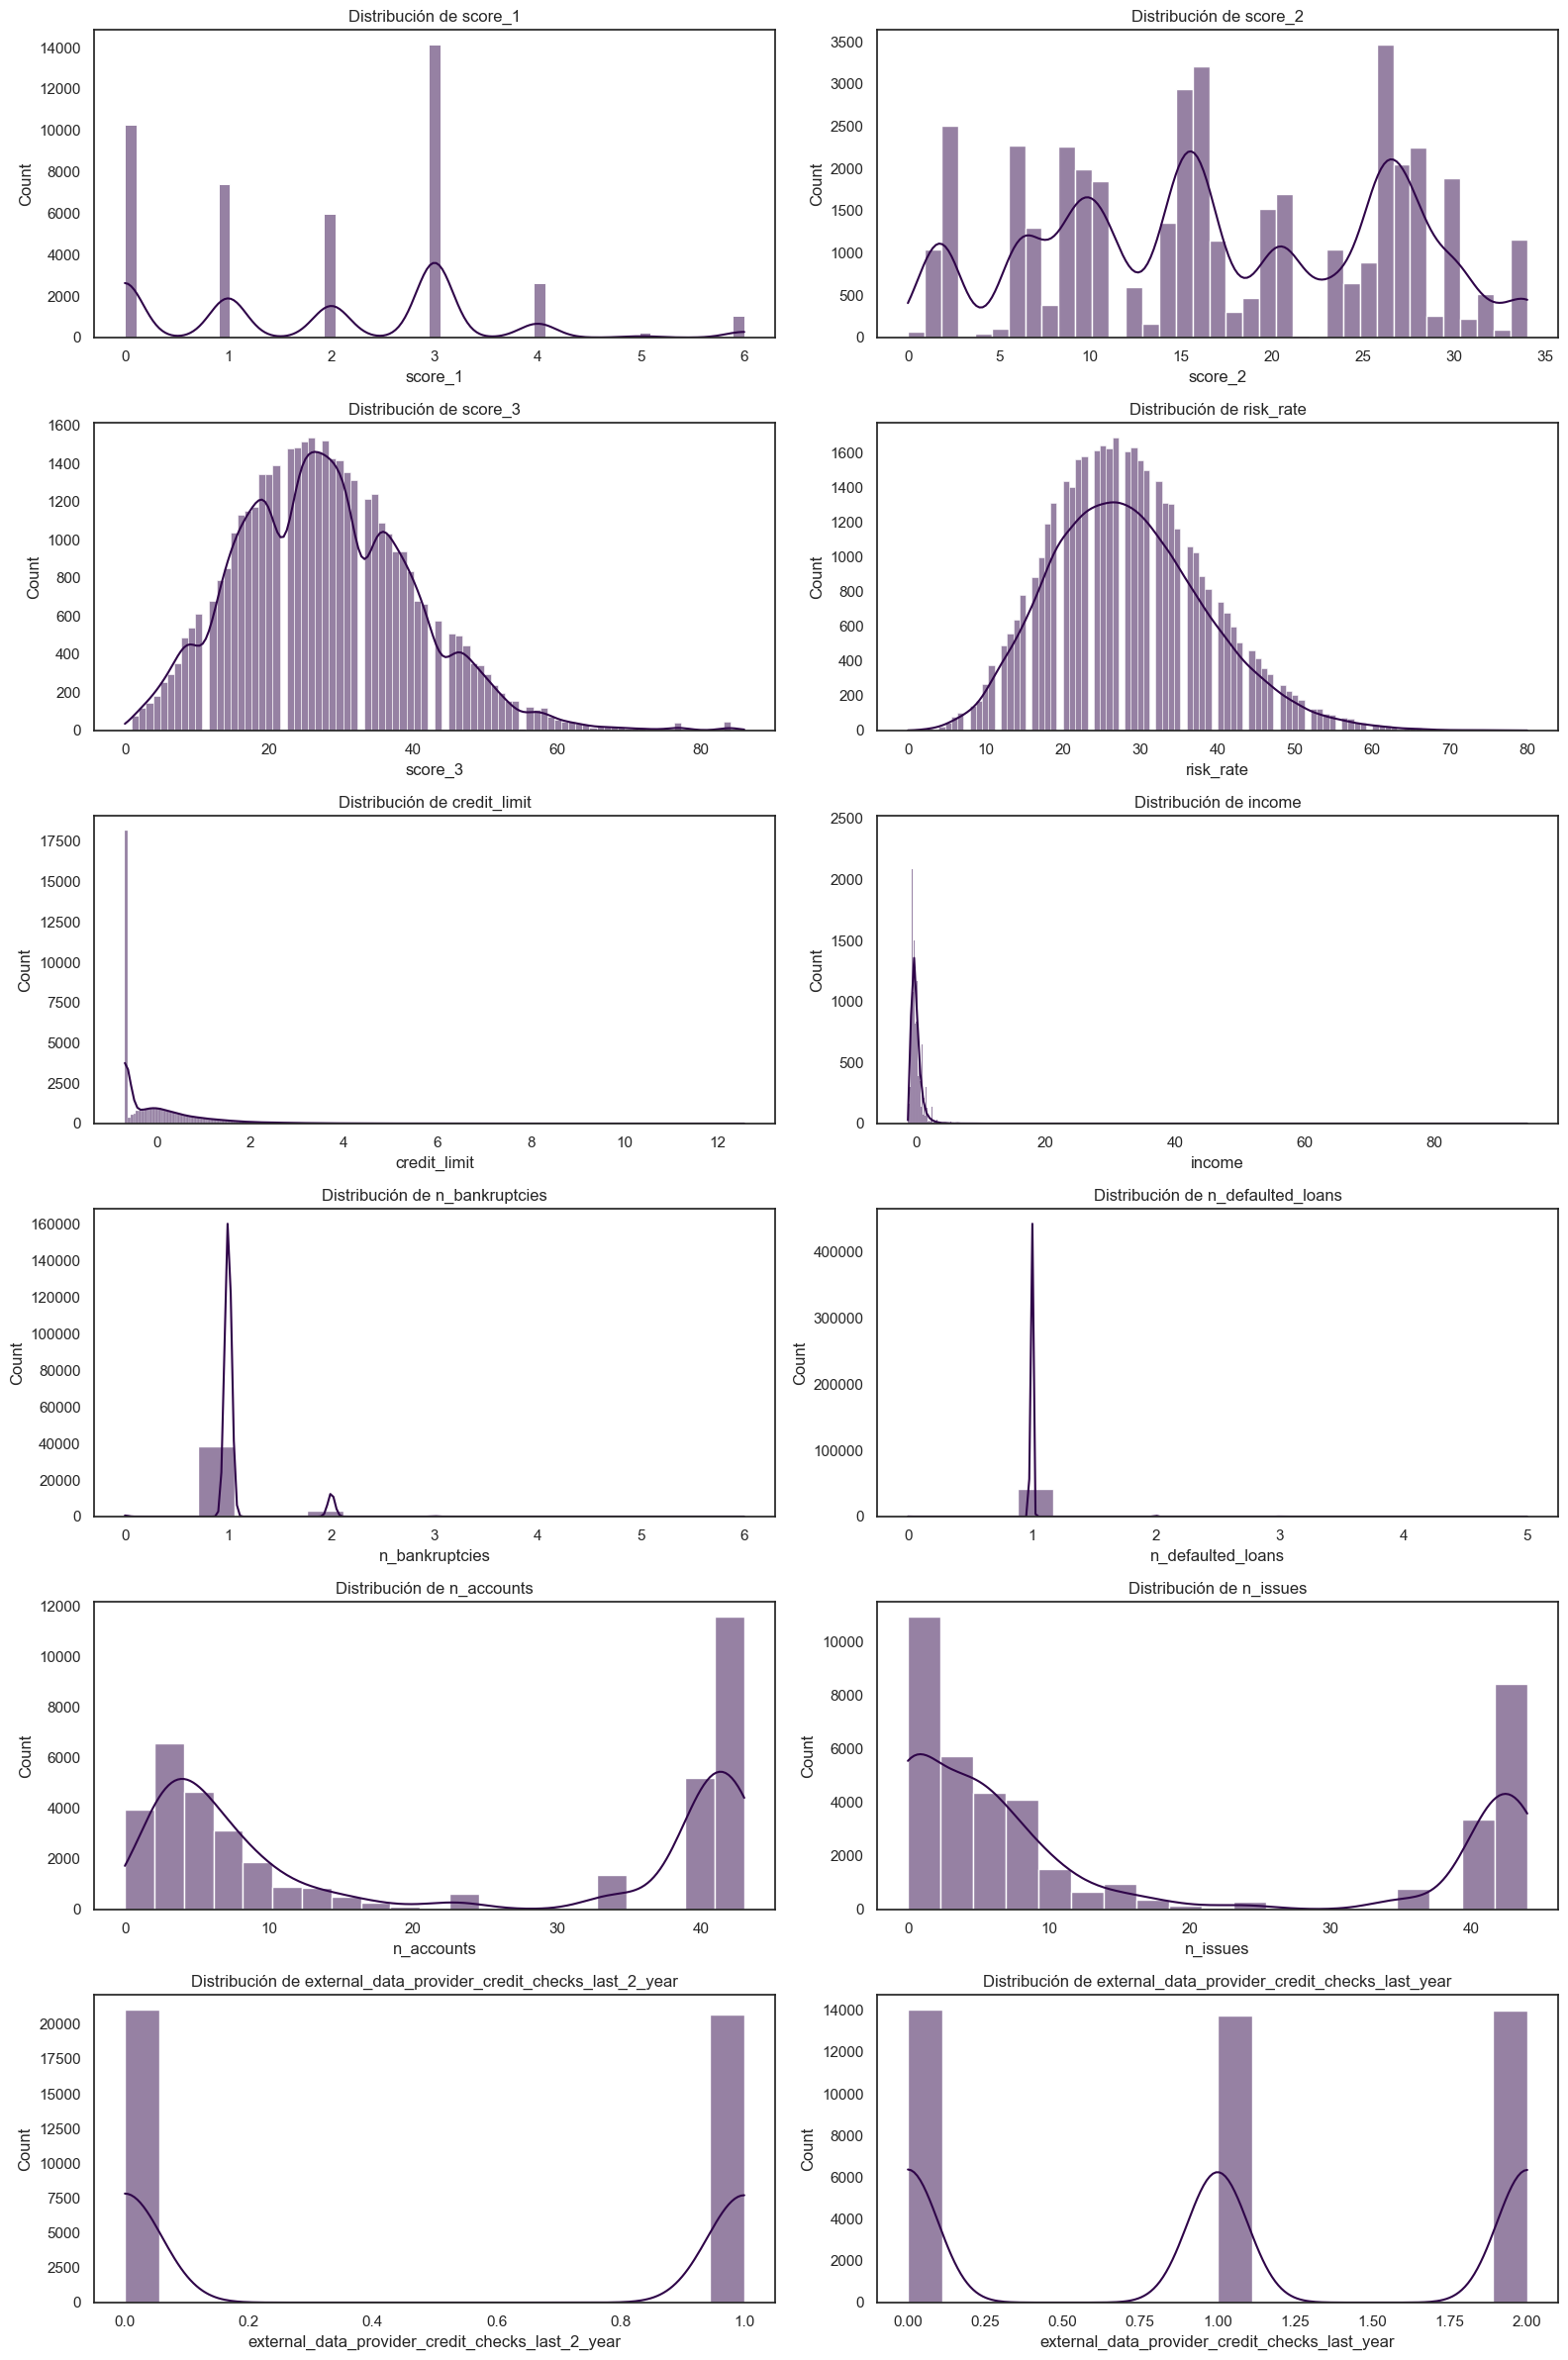

In [80]:
#Con nuestro dataset limpio, lo graficamos para ver la distribución de los datos

import matplotlib.pyplot as plt

numerical_cols = [
    'score_1', 'score_2', 'score_3', 'risk_rate', 'credit_limit', 'income',
    'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues',
    'external_data_provider_credit_checks_last_2_year', 'external_data_provider_credit_checks_last_year',
    'external_data_provider_email_seen_before'
]

numerical_cols = [col for col in numerical_cols if col in df.columns]
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 24))

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i//n_cols, i%n_cols], color='#2f0549', kde=True)
    axes[i//n_cols, i%n_cols].set_title(f'Distribución de {col}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Hacemos una prueba de modelos con Pycaret

In [81]:
#Hacemos un split de los datos para entrenar el modelo con el 80% de los datos y el 20% restante para testear el modelo
data = df.sample(frac=0.8, random_state=342)
data

target_default  score_1  score_2  score_3     score_4   score_5  \
14975               0        0       21       37   99.812997  0.510018   
16742               0        1       27       16  102.871450  0.995025   
11493               0        2       34       36  103.411927  0.860584   
22085               1        0       21       57  100.955873  0.802453   
25164               0        3        6       38   98.485835  0.100691   
...               ...      ...      ...      ...         ...       ...   
10741               0        3       16       42  102.194614  0.734095   
30762               0        0       11       20   98.917728  0.940520   
1216                0        3       15       18   97.276672  0.018772   
30656               0        2       34       40  105.303742  0.147474   
11769               0        0        2       18  102.769247  0.027736   

          score_6  risk_rate  last_amount_borrowed  last_borrowed_in_months  \
14975   91.318272         33             -0.577743                -0.687920   
16742   75.105038         24             -0.577743                -0.687920   
11493  103.156658         41             -0.577743                -0.687920   
22085   96.085439         19             -0.577743                -0.687920   
25164   79.491623         19              1.344309                 1.114130   
...           ...        ...                   ...                      ...   
10741  117.732151         26             -0.577743                -0.687920   
30762  109.171131         37             -0.577743                -0.687920   
1216    96.199314         15              0.066588                 1.114130   
30656  100.148346         37             -0.577743                -0.687920   
11769   96.889511         53              1.473261                 2.315496   

       credit_limit    income  state  job_name  real_state  n_bankruptcies  \
14975      1.268804  0.630148     47         1           1               1   
16742      0.297358  0.124631     46     13007           1               2   
11493      1.452263 -0.173207     35     11191           1               1   
22085      1.303822 -0.498416     39     13392           4               1   
25164      0.158618 -0.364687     31     22929           1               2   
...             ...       ...    ...       ...         ...             ...   
10741      1.751067  0.132774     40     13105           4               1   
30762      2.091809  0.266824     44      2883           1               1   
1216      -0.687279  1.127927     47     20118           1               1   
30656      1.177652 -0.564141     42      2272           1               1   
11769     -0.687279 -0.115932     22      8621           1               1   

       n_defaulted_loans  n_accounts  n_issues  \
14975                  1           9        10   
16742                  1          41        42   
11493                  1          11        12   
22085                  1           3         4   
25164                  1           4         5   
...                  ...         ...       ...   
10741                  1           7         8   
30762                  1          41        42   
1216                   1          42         0   
30656                  1           2         3   
11769                  1           3         0   

       external_data_provider_credit_checks_last_2_year  \
14975                                                 1   
16742                                                 0   
11493                                                 0   
22085                                                 0   
25164                                                 0   
...                                                 ...   
10741                                                 1   
30762                                                 0   
1216                                                  0   
30656                                    

In [82]:
data_unseen = df.drop(data.index)
data_unseen

target_default  score_1  score_2  score_3     score_4   score_5  \
3                   0        0       21       46  101.599485  0.987673   
7                   0        3        9       26  100.342564  0.491610   
14                  0        3       26       30   99.199123  0.677613   
17                  0        1        7       24  100.525465  0.229163   
20                  0        0       11       54   98.100452  0.796059   
...               ...      ...      ...      ...         ...       ...   
44960               0        1       27       27  101.672437  0.801195   
44961               0        1       27        8   99.533639  0.996080   
44962               0        4       12       23  101.743287  0.705085   
44973               0        2        1        7  101.062057  0.979801   
44986               0        3        6       28  102.327480  0.495200   

          score_6  risk_rate  last_amount_borrowed  last_borrowed_in_months  \
3       94.902491         31             -0.577743                 -0.68792   
7      115.954187         32             -0.577743                 -0.68792   
14      97.849481         37             -0.577743                 -0.68792   
17     109.907561         12              1.987141                  1.11413   
20     101.458418         17             -0.577743                 -0.68792   
...           ...        ...                   ...                      ...   
44960   93.040662         36             -0.577743                 -0.68792   
44961   94.546611         18             -0.577743                 -0.68792   
44962  107.219515         45             -0.577743                 -0.68792   
44973  112.808520         21              0.127918                  1.11413   
44986  106.260349         20             -0.577743                 -0.68792   

       credit_limit    income  state  job_name  real_state  n_bankruptcies  \
3          0.927293 -0.043057     23        79           3               2   
7          0.574602  0.171156     41      8002           1               1   
14        -0.687279 -0.307465      8      1542           1               1   
17        -0.687279  0.936589      6         1           1               1   
20        -0.687279 -0.804611     16     15710           3               1   
...             ...       ...    ...       ...         ...             ...   
44960      3.919652  0.649555      1     25855           1               1   
44961     -0.687279 -0.077707      6      8490           3               1   
44962      1.026963  1.223367      2     29673           1               1   
44973      2.583152 -0.211962     47      3976           3               1   
44986     -0.687279 -0.326726     12     10221           1               1   

       n_defaulted_loans  n_accounts  n_issues  \
3                      1          11        12   
7                      1          41        42   
14                     1          42         0   
17                     1           5         6   
20                     1          34         0   
...                  ...         ...       ...   
44960                  1          42        43   
44961                  1          40        41   
44962                  1           8         9   
44973                  1           7         8   
44986                  1          43        44   

       external_data_provider_credit_checks_last_2_year  \
3                                                     0   
7                                                     1   
14                                                    1   
17                                                    0   
20                                                    1   
...                                                 ...   
44960                                                 1   
44961                                                 0   
44962                                                 1   
44973                                    

In [83]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (33393, 26)
Unseen Data For Predictions: (8348, 26)


In [84]:
from pycaret.classification import *
model_setup = setup(data = data, target = 'target_default', session_id=456)

In [85]:
models()

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                                                                  
lr        sklearn.linear_model._logistic.LogisticRegression   True  
knn       sklearn.neighbors._classification.KNeighborsCl...   True  
nb                           sklearn.naive_bayes.GaussianNB   True  
dt             sklearn.tree._classes.DecisionTreeClassifier   True  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True  
rbfsvm                             sklearn.svm._classes.SVC  False  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True  
rf          sklearn.ensemble._forest.RandomForestClassifier   True  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True  
xgboost                       xgboost.sklearn.XGBClassifier   True  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True  
dummy                         sklearn.dummy.DummyClassifier   True

In [86]:
best_model = compare_models()

Aunque tenemos varios modelos con métricas sobresalientes, hemos decidido centrarnos en el Gradiente Boosting Classifier (gbc) ya que consideramos que destaca por su capacidad de mantener un buen equilibrio entre diferentes métricas, especialmente en los términos de AUC, ya que tiene la mejor con un 0.7159, lo que lo hace adecuado para aplicaciones donde la capacidad de distinguie entre clases es crítica.

En cuanto al Balance General, aunque no tiene los valores más altos de todas las métricas, si que muestra un buen equillibrio entre precisión, recall y otras métricas, lo que lo convierte en una buena opción robusta y versátil para tareas de clasificación.

Por último, destacamos la estabilidad, ya que la combinacion de una alta precisión, un buen AUC y el razonable recall sugiere que el gbc es un modelo estable que no sacrifica un aspecto de rendimiento por otro.

In [87]:
model_gbc = create_model('gbc')
print(model_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [88]:
evaluate_model(model_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [89]:
unseen_predictions = predict_model(model_gbc, data=data_unseen)
unseen_predictions.head()

score_1  score_2  score_3     score_4   score_5     score_6  risk_rate  \
0        0       21       46  101.599487  0.987673   94.902489         31   
1        3        9       26  100.342567  0.491610  115.954185         32   
2        3       26       30   99.199120  0.677613   97.849480         37   
3        1        7       24  100.525467  0.229163  109.907562         12   
4        0       11       54   98.100449  0.796059  101.458420         17   

   last_amount_borrowed  last_borrowed_in_months  credit_limit  ...  \
0             -0.577743                 -0.68792      0.927293  ...   
1             -0.577743                 -0.68792      0.574602  ...   
2             -0.577743                 -0.68792     -0.687279  ...   
3              1.987141                  1.11413     -0.687279  ...   
4             -0.577743                 -0.68792     -0.687279  ...   

   external_data_provider_credit_checks_last_2_year  \
0                                                 0   
1                                                 1   
2                                                 1   
3                                                 0   
4                                                 1   

   external_data_provider_credit_checks_last_month  \
0                                                3   
1                                                3   
2                                                3   
3                                                2   
4                                                3   

   external_data_provider_credit_checks_last_year  \
0                                               0   
1                                               1   
2                                               0   
3                                               1   
4                                               2   

   external_data_provider_fraud_score  marketing_channel  reported_income  \
0                                 815                  8        -0.040691   
1                                 415                  8        -0.040691   
2                                  38                  9        -0.040691   
3                                 914                  0        -0.040691   
4                                 686                  0        -0.040691   

   target_fraud  target_default  prediction_label  prediction_score  
0             0               0                 0            0.8163  
1             0               0                 0            0.9228  
2             0               0                 0            0.8682  
3             0               0                 0            0.9499  
4             0               0                 0            0.8280  

[5 rows x 28 columns]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X = df.drop('target_default', axis=1)
y = df['target_default']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)

In [91]:
GBC = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False
    )
GBC.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      7023
           1       0.78      0.12      0.21      1326

    accuracy                           0.86      8349
   macro avg       0.82      0.56      0.57      8349
weighted avg       0.84      0.86      0.81      8349

AUC: 0.5581


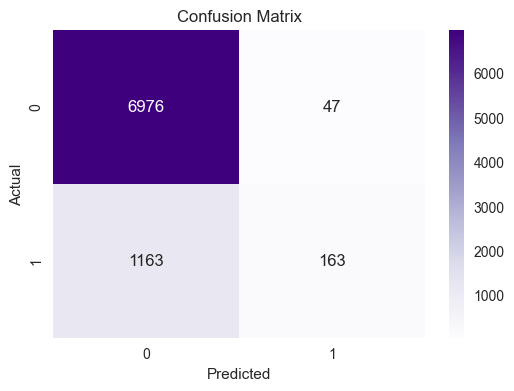

In [92]:
from sklearn.metrics import classification_report, roc_auc_score ,confusion_matrix
y_preds = GBC.predict(X_test)
print(classification_report(y_test, y_preds))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_preds)))

cm = confusion_matrix(y_test, y_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

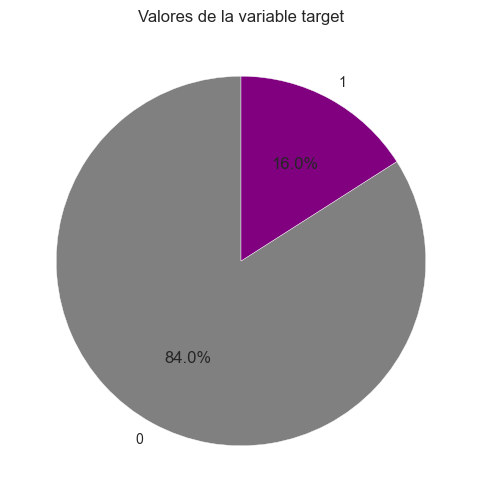

In [93]:

count_values = df['target_default'].value_counts()

plt.figure(figsize=(8, 6))
count_values.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['grey', 'purple'])
plt.title('Valores de la variable target')
plt.ylabel('')
plt.show()

Es esta gráfica observamos un problema grande con la variable 1 probablemente debido a que hay muchos ceros o a tener un numero muy pequeño para suport.

Se podría emplear la técnica de submuestreo, pero las muestras se harían muy pequeñas, por lo que preferimos usar el SMOTE que es una tecnica de KNN para balancear las muestras.

In [94]:
from imblearn.over_sampling import SMOTE

X = df.drop('target_default', axis=1)
y = df['target_default']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=242)

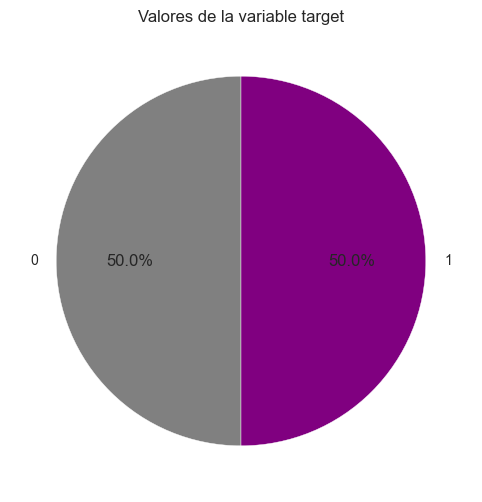

In [95]:
#ahora tenemos las variables balanceadas
yseries = pd.Series(y)
count_values = yseries.value_counts()

plt.figure(figsize=(8, 6))
count_values.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['grey', 'purple'])
plt.title('Valores de la variable target')
plt.ylabel('')
plt.show()


#### Se genera un nuevo modelo más balanceado.

In [96]:
GBC = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False
    )
GBC.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=456, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7067
           1       0.90      0.78      0.84      6965

    accuracy                           0.85     14032
   macro avg       0.86      0.85      0.85     14032
weighted avg       0.86      0.85      0.85     14032

AUC: 0.8484


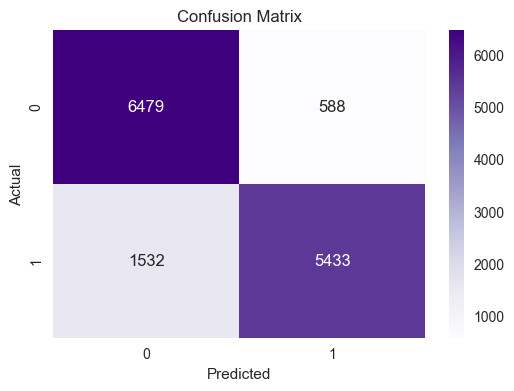

In [97]:
from sklearn.metrics import classification_report, roc_auc_score ,confusion_matrix
y_preds = GBC.predict(X_test)
print(classification_report(y_test, y_preds))
print('AUC: {:.4f}'.format(roc_auc_score(y_test, y_preds)))

cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Ahora tenemos un balanceamiento del recall entre las variables y una acuracy total de 0.85.

In [98]:
#generamos el modelo
import joblib
#joblib.dump(GBC, 'modelo_GBC.pkl')

Pasamos todo a espanol para las graficas.

In [99]:
df_copy.rename(columns={
    'target_default': 'objetivo predeterminado',
    'score_1': 'puntaje1',
    'score_2': 'puntaje2',
    'score_3': 'puntaje3',
    'score_4': 'puntaje4',
    'score_5': 'puntaje5',
    'score_6': 'puntaje6',
    'risk_rate': 'tasa de riesgo',
    'n_accounts': 'número de cuentas',
    'n_issues': 'número de asuntos',
    'external_data_provider_credit_checks_last_2_year': 'Verificaciones de crédito del proveedor de datos externos en los últimos 2 años.',
    'last_amount_borrowed': 'última cantidad prestada',
    'last_borrowed_in_months': 'último préstamo en meses',
    'credit_limit': 'límite de crédito',
    'income': 'ganancias',
    'state': 'estado',
    'job_name': 'nombre del trabajo',
    'real_state': 'inmobiliaria',
    'n_bankruptcies': 'número de quiebras',
    'n_defaulted_loans': 'préstamos incumplidos',
    'external_data_provider_credit_checks_last_month': 'Verificaciones de crédito del proveedor de datos externo el mes pasado',
    'external_data_provider_credit_checks_last_year': 'Verificaciones de crédito del proveedor de datos externo el año pasado',
    'external_data_provider_fraud_score': 'puntuación de fraude del proveedor de datos externos',
    'marketing_channel': 'Canal de marketing',
    'reported_income': 'ingreso reportado',
    'target_fraud': 'fraude tarjeta'
}, inplace=True)

df_copy_encoded.rename(columns={
    'target_default': 'objetivo predeterminado',
    'score_1': 'puntaje1',
    'score_2': 'puntaje2',
    'score_3': 'puntaje3',
    'score_4': 'puntaje4',
    'score_5': 'puntaje5',
    'score_6': 'puntaje6',
    'risk_rate': 'tasa de riesgo',
    'n_accounts': 'número de cuentas',
    'n_issues': 'número de asuntos',
    'external_data_provider_credit_checks_last_2_year': 'Verificaciones de crédito del proveedor de datos externos en los últimos 2 años.',
    'last_amount_borrowed': 'última cantidad prestada',
    'last_borrowed_in_months': 'último préstamo en meses',
    'credit_limit': 'límite de crédito',
    'income': 'ganancias',
    'state': 'estado',
    'job_name': 'nombre del trabajo',
    'real_state': 'inmobiliaria',
    'n_bankruptcies': 'número de quiebras',
    'n_defaulted_loans': 'préstamos incumplidos',
    'external_data_provider_credit_checks_last_month': 'Verificaciones de crédito del proveedor de datos externo el mes pasado',
    'external_data_provider_credit_checks_last_year': 'Verificaciones de crédito del proveedor de datos externo el año pasado',
    'external_data_provider_fraud_score': 'puntuación de fraude del proveedor de datos externos',
    'marketing_channel': 'Canal de marketing',
    'reported_income': 'ingreso reportado',
    'target_fraud': 'fraude tarjeta'
}, inplace=True)

In [100]:
df_copy

objetivo predeterminado                  puntaje1  \
0                       False  1Rk8w4Ucd5yR3KcqZzLdow==   
1                       False  DGCQep2AE5QRkNCshIAlFQ==   
2                        True  DGCQep2AE5QRkNCshIAlFQ==   
3                       False  1Rk8w4Ucd5yR3KcqZzLdow==   
4                       False  8k8UDR4Yx0qasAjkGrUZLw==   
...                       ...                       ...   
44995                   False  DGCQep2AE5QRkNCshIAlFQ==   
44996                   False  smzX0nxh5QlePvtVf6EAeg==   
44997                   False  e4NYDor1NOw6XKGE60AWFw==   
44998                    True  smzX0nxh5QlePvtVf6EAeg==   
44999                   False  8k8UDR4Yx0qasAjkGrUZLw==   

                       puntaje2 puntaje3    puntaje4  puntaje5    puntaje6  \
0      IOVu8au3ISbo6+zmfnYwMg==    350.0  101.800832  0.259555  108.427273   
1      SaamrHMo23l/3TwXOWgVzw==    370.0   97.062615  0.942655   92.002546   
2      Fv28Bz0YRTVAT5kl1bAV6g==    360.0  100.027073  0.351918  112.892453   
3      dCm9hFKfdRm7ej3jW+gyxw==    510.0  101.599485  0.987673   94.902491   
4      +CxEO4w7jv3QPI/BQbyqAA==    500.0   98.474289  0.532539  118.126207   
...                         ...      ...         ...       ...         ...   
44995  SaamrHMo23l/3TwXOWgVzw==    280.0   96.379531  0.416693  103.667082   
44996  vJyc9xom9v7hwFMPTIpmKw==    370.0   96.124977  0.692196   97.977973   
44997  ky19q4V1ZqgL3jnHX0wKDw==    280.0  102.377780  0.530938   93.687747   
44998  6J1ZMTzN5GKHXnhM4J1JbA==    240.0  100.476090  0.214697   86.759074   
44999  wkeCdGeu5sEv4/fjwR0aDg==    530.0  101.095813  0.011369   97.362918   

      tasa de riesgo  última cantidad prestada  último préstamo en meses  ...  \
0                0.4                  2.627224                   1.11413  ...   
1               0.24                 -0.577743                  -0.68792  ...   
2               0.29                  0.345051                   1.11413  ...   
3               0.32                 -0.577743                  -0.68792  ...   
4               0.18                 -0.577743                  -0.68792  ...   
...              ...                       ...                       ...  ...   
44995           0.17                  1.312728                   1.11413  ...   
44996           0.27                 -0.577743                  -0.68792  ...   
44997            0.3                 -0.577743                  -0.68792  ...   
44998           0.37                 -0.577743                  -0.68792  ...   
44999           0.31                 -0.036615                   1.11413  ...   

       préstamos incumplidos  número de cuentas número de asuntos  \
0                        0.0               18.0              18.0   
1                        0.0               14.0              14.0   
2                        0.0               10.0                 0   
3                        0.0               19.0              19.0   
4                        0.0               11.0                 0   
...                      ...                ...               ...   
44995                    0.0                7.0               7.0   
44996                    0.0               16.0              16.0   
44997                    0.0                6.0               6.0   
44998                    0.0               10.0              10.0   
44999                    0.0               10.0              10.0   

      Verificaciones de crédito del proveedor de datos externos en los últimos 2 años.  \
0                                                      0                                 
1                                                    0.0                                 
2                                                      0                                 
3                                                      0                                 
4                                                    0.0                                 
...               

In [101]:
df_copy_encoded

objetivo predeterminado  puntaje1  puntaje2  puntaje3    puntaje4  \
0                            0         0        10        28  101.800832   
1                            0         3        16        30   97.062615   
2                            1         3         9        29  100.027073   
3                            0         0        21        46  101.599485   
4                            0         2         1        45   98.474289   
...                        ...       ...       ...       ...         ...   
44995                        0         3        16        20   96.379531   
44996                        0         6        31        30   96.124977   
44997                        0         4        24        20  102.377780   
44998                        1         6         5        16  100.476090   
44999                        0         2        34        48  101.095813   

       puntaje5    puntaje6  tasa de riesgo  última cantidad prestada  \
0      0.259555  108.427273              39                  2.627224   
1      0.942655   92.002546              23                 -0.577743   
2      0.351918  112.892453              28                  0.345051   
3      0.987673   94.902491              31                 -0.577743   
4      0.532539  118.126207              17                 -0.577743   
...         ...         ...             ...                       ...   
44995  0.416693  103.667082              16                  1.312728   
44996  0.692196   97.977973              26                 -0.577743   
44997  0.530938   93.687747              29                 -0.577743   
44998  0.214697   86.759074              36                 -0.577743   
44999  0.011369   97.362918              30                 -0.036615   

       último préstamo en meses  ...  préstamos incumplidos  \
0                       1.11413  ...                      1   
1                      -0.68792  ...                      1   
2                       1.11413  ...                      1   
3                      -0.68792  ...                      1   
4                      -0.68792  ...                      1   
...                         ...  ...                    ...   
44995                   1.11413  ...                      1   
44996                  -0.68792  ...                      1   
44997                  -0.68792  ...                      1   
44998                  -0.68792  ...                      1   
44999                   1.11413  ...                      1   

       número de cuentas  número de asuntos  \
0                     10                 11   
1                      6                  7   
2                      2                  0   
3                     11                 12   
4                      3                  0   
...                  ...                ...   
44995                 41                 42   
44996                  8                  9   
44997                 40                 41   
44998                  2                  3   
44999                  2                  3   

       Verificaciones de crédito del proveedor de datos externos en los últimos 2 años.  \
0                                                      0                                  
1                                                      1                                  
2                                                      0                                  
3                                                      0                                  
4                                                      1                                  
...                                                  ...                                  
44995                                                  1                                  
44996                                                  0                                  
44997                                                  0                    

Procedemos a analizar las variables mediante distintas gráficas que nos ayudaran a entender mejor cómo se distribuyen los datos y detectar posibles anomalías, sesgos o características especiales; para ello usamos un histograma con una línea de densidad.

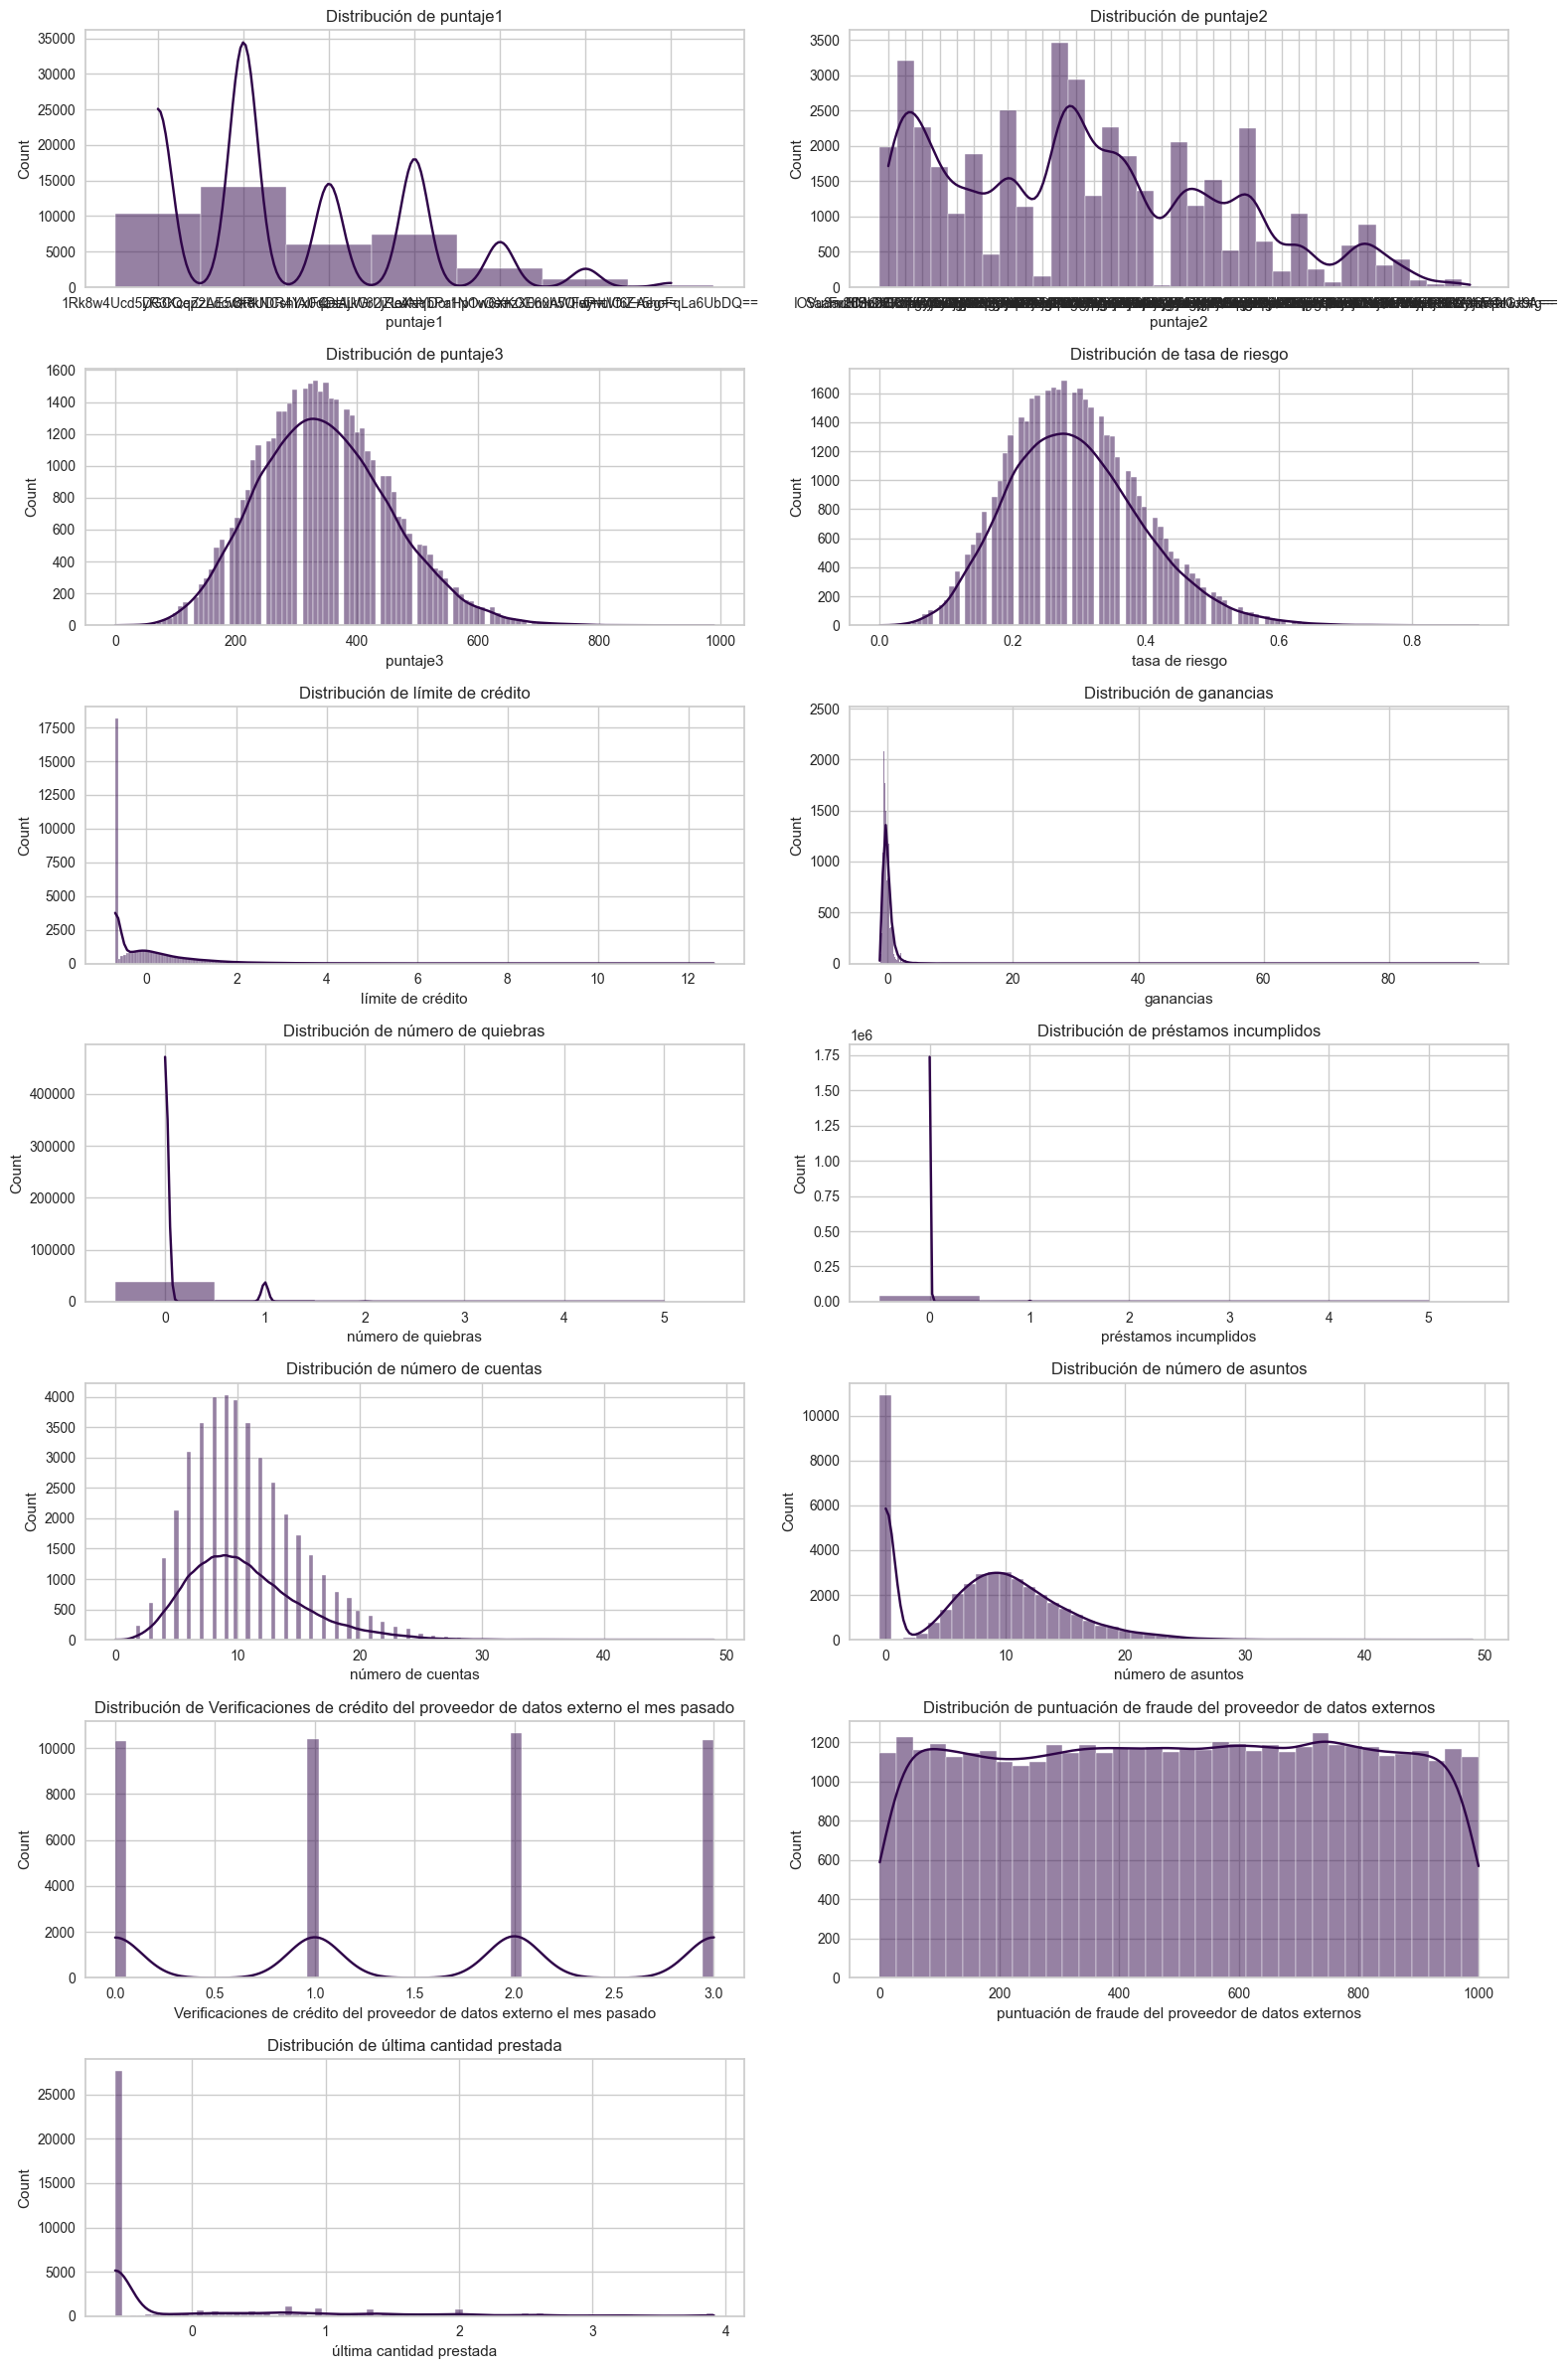

In [102]:
num_cols = ['puntaje1', 'puntaje2', 'puntaje3', 'tasa de riesgo', 'límite de crédito', 'ganancias','número de quiebras', 'préstamos incumplidos', 'número de cuentas', 'número de asuntos','Verificaciones de crédito del proveedor de datos externo en los últimos 2 años.','Verificaciones de crédito del proveedor de datos externo el mes pasado', 'puntuación de fraude del proveedor de datos externos','última cantidad prestada']
 

num_cols = [col for col in num_cols if col in df_copy_encoded.columns]
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 24))

for i, col in enumerate(num_cols):
    sns.histplot(data=df_copy, x=col, ax=axes[i//n_cols, i%n_cols], kde=True, color='#2f0549')
    axes[i//n_cols, i%n_cols].set_title(f'Distribución de {col}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()
#"images_dataset/variables.png

1. Distribución de puntaje1

La gráfica muestra varios picos pronunciados, lo que sugiere que hay algunos valores de puntaje1 que son mucho más comunes que otros, y que la variable no sigue una distribución normal simple.

2. Distribución de puntaje2

Similar a puntaje1, puntaje2 también muestra múltiples picos, aunque parecen ser más dispersos.
La distribución no es uniforme y hay varios puntos donde los valores se agrupan.

3. Distribución de puntaje3

La distribución de puntaje3 se asemeja a una distribución normal, con una forma de campana simétrica.
La mayoría de los valores están concentrados en el centro, con menos valores en los extremos.

4. Distribución de tasa de riesgo

La tasa de riesgo muestra una distribución aproximadamente normal, aunque con cierta asimetría hacia la derecha.
La mayoría de los valores están en el rango de 0.2 a 0.5.

5. Distribución de límite de crédito

La mayoría de los valores de límite de crédito están cerca de 0, con muy pocos valores altos.
Hay un pico pronunciado al inicio y una larga cola hacia la derecha, indicando una distribución sesgada.

6. Distribución de ganancias

La distribución de ganancias es altamente sesgada hacia la derecha, con la mayoría de los valores concentrados cerca de 0.
Muy pocos individuos tienen ganancias significativamente altas.

7. Distribución de número de quiebras

La mayoría de las personas no tienen quiebras (0), con muy pocos casos de 1 o más quiebras.
Distribución altamente sesgada hacia la izquierda.

8. Distribución de préstamos incumplidos

La mayoría de los individuos no tienen préstamos incumplidos (0), existen pocos casos de 1 o más incumplimientos.
La distribución está altamente sesgada hacia la izquierda.

9. Distribución de número de cuentas

La mayoría de los individuos tienen entre 0 y 20 cuentas, con una distribución que parece ligeramente sesgada hacia la derecha.
Hay una disminución gradual en el número de cuentas más altas.

10. Distribución de número de asuntos

Similar a número de cuentas, la mayoría de los individuos tienen pocos asuntos, con una disminución gradual hacia números más altos.
Hay un pico al inicio y una larga cola hacia la derecha.

11. . Distribución de Verificaciones de crédito del proveedor de datos externo el mes pasado

La mayoría de las verificaciones de crédito están en el rango de 0 a 3, con picos en valores enteros.
Hay una periodicidad en los picos, sugiriendo que las verificaciones pueden ocurrir en intervalos específicos.

12. Distribución de puntuación de fraude del proveedor de datos externos

La puntuación de fraude está distribuida de manera bastante uniforme entre 0 y 1000.
No hay picos o modos claros, indicando una distribución relativamente plana.

13. Distribución de última cantidad prestada

La mayoría de los valores de la última cantidad prestada están cerca de 0, con muy pocos valores altos.
Hay un pico pronunciado al inicio y una larga cola hacia la derecha, indicando una distribución sesgada.

# Presentación de las variables:
 
 
 
| Variable                                                     | Descripción                                                                                                                                                                 |
|--------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `target_default` (objetivo predeterminado)                   | Indica si el cliente ha incumplido con sus pagos o no. Es una variable binaria donde 0 significa que no ha incumplido y 1 significa que sí ha incumplido.                   |
| `score1, 2, 3, 4, 5 y 6`(puntajes 1, 2, 3, 4, 5 y 6)  | Puntajes numéricos que evalúan aspectos del riesgo o comportamiento financiero  del cliente.                                                                                |
| `risk_rate` (tasa de riesgo)                                  | Tasa que indica el nivel de riesgo asociado con el cliente. Puede estar basado en varios factores incluyendo los puntajes anteriores.                                       |
| `n_accounts` (número de cuentas)                             | El número total de cuentas financieras que tiene el cliente.                                                                                                                |
| `n_issues` (número de asuntos)                               | Número de problemas o incidentes financieros que el cliente ha tenido.                                                                                                      |
| `external_data_provider_credit_checks_last_2_year` (verificaciones de crédito del proveedor de datos externo en los últimos 2 años) | El número de veces que el crédito del cliente ha sido verificado por proveedores de datos externos en los últimos dos años.                                                 |
| last_amount_borrowed (última cantidad prestada)            | La cantidad de dinero que el cliente tomó prestado la última vez.                                                                                                           |
| `last_borrowed_in_months` (último préstamo en meses)         | El tiempo, en meses, desde que el cliente tomó su último préstamo.                                                                                                          |
| `credit_limit` (límite de crédito)                           | El límite máximo de crédito que se le ha otorgado al cliente.                                                                                                               |
| `income` (ganancias)                                         | Los ingresos del cliente.                                                                                                                                                   |
| `state` (estado)                                             | El estado de residencia del cliente.                                                                                                                                        |
| `job_name` (nombre del trabajo)                              | El título o nombre del trabajo del cliente.                                                                                                                                 |
| `real_state` (inmobiliaria)                                  | Información relacionada con propiedades inmobiliarias que el cliente pueda poseer.                                                                                          |
| `n_bankruptcies` (número de quiebras)                        | El número de veces que el cliente ha declarado bancarrota.                                                                                                                  |
| `n_defaulted_loans` (préstamos incumplidos)                  | El número de préstamos que el cliente ha incumplido.                                                                                                                        |
| `external_data_provider_credit_checks_last_month` (verificaciones de crédito del proveedor de datos externo el mes pasado) | El número de verificaciones de crédito que se realizaron el mes pasado por proveedores de datos externos.                                                                   |
| `external_data_provider_credit_checks_last_year` (verificaciones de crédito del proveedor de datos externo el año pasado)  | El número de verificaciones de crédito realizadas en el último año por proveedores de datos externos.                                                                       |
| `external_data_provider_fraud_score` (puntuación de fraude del proveedor de datos externos) | Un puntaje que indica el nivel de riesgo de fraude asociado con el cliente, basado en datos de proveedores externos.                                                        |
| `marketing_channel` (canal de marketing)                     | El canal a través del cual el cliente fue adquirido o contactado (por ejemplo, email, redes sociales, anuncios pagados, etc.).                                              |
| `reported_income` (ingreso reportado)                        | El ingreso que el cliente ha reportado.                                                                                                                                     |
| `target_fraud` (fraude tarjeta)                              | Indica si el cliente ha cometido fraude con tarjetas. Es una variable binaria donde 0 significa que no ha cometido fraude y 1 significa que sí ha cometido fraude.           |

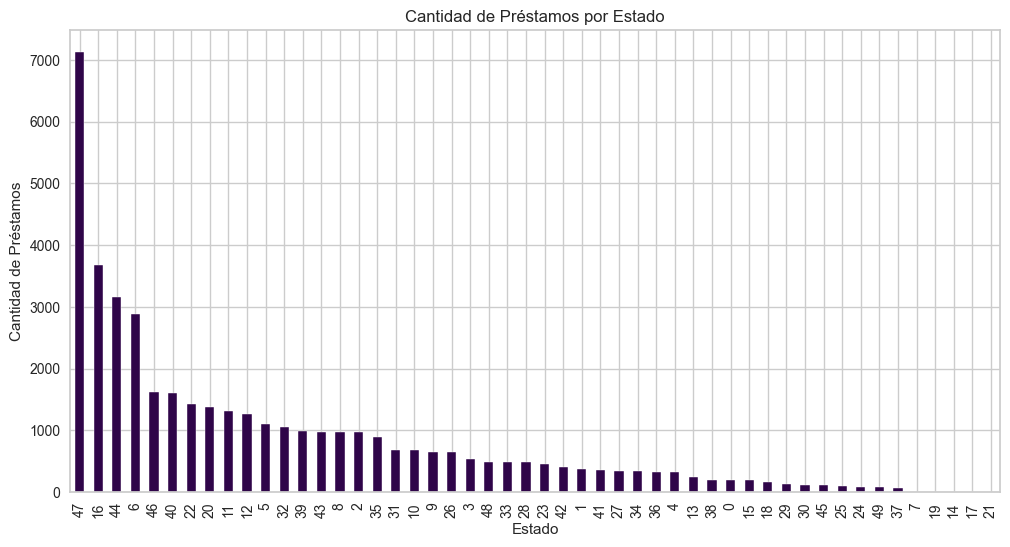

In [103]:
plt.figure(figsize=(12, 6))
df_copy_encoded['estado'].value_counts().plot(kind='bar', color='#2f0549')
plt.title('Cantidad de Préstamos por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Préstamos')
plt.show()
#"images_dataset/prestamosporestado.png"

En este gráfico podemos observar una distribución desigual en la cantidad de préstamos por estado (el estado 47 tiene la mayor cantidad de préstamos, superando los 7.000, pero tenemmos otros estados con grandes cantidades de préstamos como 16, 14, 6 y 46, en el lado opuesto encontramos los estados: 20, 22, 11, 12 5 y 32 con valores cercanos a 0).

Existe una clara tendencia decreciente en la cantidad de préstamos conforme se avanza del estado 47 al 21, esto indica que unos pocos estados tienen una cantidad significativamente más alta de préstamos, mientras otros tienen cantidades mucho menores.

Esta información podría ser útil para entender la demanda de préstamos en diferentes regiones y para identificar áreas dónde se podrían enfocar más recursos o políticas para equilibrar la distribución de préstamos.

Los estados estan por numeros pues estan encriptados en el dataset.

In [104]:
import plotly.express as px
df_valid = df_copy[df_copy['límite de crédito'] > 0]
fig = px.scatter(df_valid, x='tasa de riesgo', y='ganancias', color='objetivo predeterminado',
                 size='límite de crédito', hover_data=['puntaje1', 'puntaje2', 'puntaje3'],
                 title='Relación entre la Tasa de Riesgo y las Ganancias',
                 labels={'tasa de riesgo': 'Tasa de Riesgo', 'ganancias': 'Ganancias', 'objetivo predeterminado': 'Objetivo Predeterminado'},
                 template='plotly_white')
fig.show()
#fig.write_html("images_dataset/tasariesgoyganancias.html")

En esta gráfica comparamos la tasa de riesgo y las ganancias, donde si que vemos una alta concentración de puntos en la zona de baja tasa de riesgo y bajas ganancias.

La gráfica muestra que no hay una correlación clara entre la tasa de riesgo y las ganancias, ya que los puntos están bastante dispersos a lo largo de los ejes. El objetivo predeterminado se cumple tanto en condiciones de baja como alta tasa de riesgo y ganancias. La mayoría de las observaciones están concentradas en niveles bajos de riesgo y bajas ganancias. Esto sugiere que otros factores podrían estar influyendo en las ganancias y en el cumplimiento del objetivo, además de la tasa de riesgo.

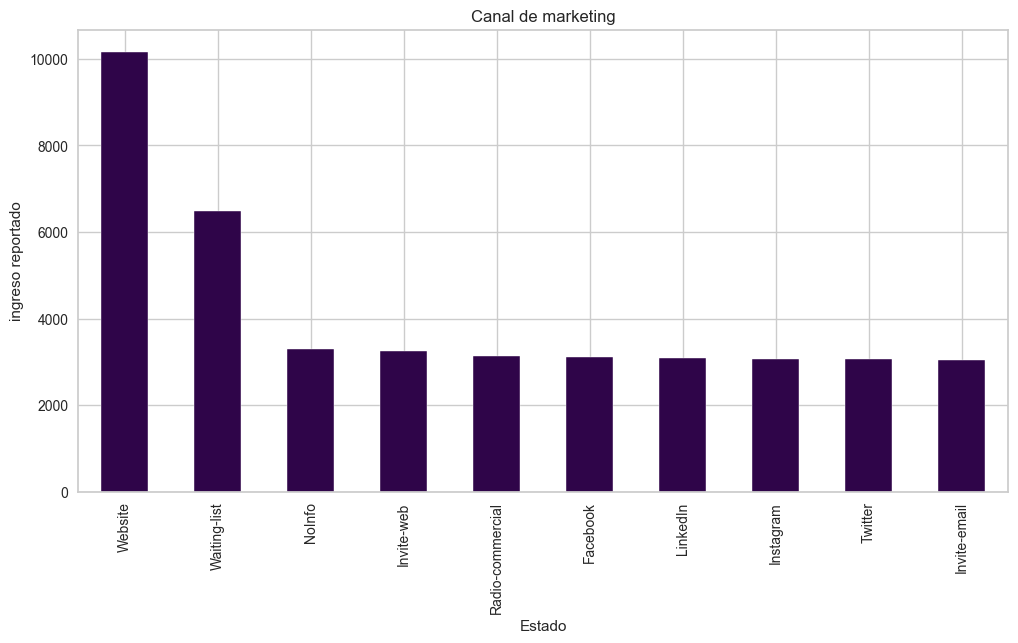

In [105]:

plt.figure(figsize=(12, 6))
df_copy['Canal de marketing'].value_counts().plot(kind='bar', color='#2f0549')
plt.title('Canal de marketing')
plt.xlabel('Estado')
plt.ylabel('ingreso reportado')
plt.show()
#("images_dataset/canaldemarketing.png")

Esta gráfica de barras indica que el Website es el canal de marketing más efectivo en términos de ingresos, por lo que las estrategias de marketing deberían centrarse fuertemente en este canal (superando los 10.000 ingresos) y seguido por el Waiting list con unos ingresos alrededor de 7.000. Los demás canales tienen un rendimiento similar pero significativamente menor. Se recomienda enfocarse en fortalecer la presencia y estrategia en el Website mientras se buscan maneras de mejorar el rendimiento de los otros canales de marketing.

#### ahora analisaremos los numeros oficiales del banco que estan disponibles en : https://www.investidores.nu/acoes/graficos-e-cotacao/

In [106]:
import pandas as pd
inv = pd.read_excel('Histórico de Cotações-20240710.xls')
inv.columns = inv.iloc[0]
inv = inv[1:].reset_index(drop=True)
inv['Data'] = pd.to_datetime(inv['Data'], format='%d/%m/%Y')

In [107]:
inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Data                 20 non-null     datetime64[ns]
 1   Abertura             20 non-null     object        
 2   Máxima               20 non-null     object        
 3   Mínima               20 non-null     object        
 4   Fechado              20 non-null     object        
 5   Média                20 non-null     object        
 6   Variação             20 non-null     object        
 7   Volume               20 non-null     object        
 8   Quantidade de Ações  20 non-null     object        
 9   Negócios             20 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 1.7+ KB


In [108]:
inv.head()

0       Data Abertura Máxima Mínima Fechado Média Variação     Volume  \
0 2024-07-09    12,88  13,24  12,73   13,15     0   2,41 %  399884228   
1 2024-07-08     12,8  12,88  12,64   12,84     0   0,16 %  222631476   
2 2024-07-05    12,47  12,83   12,4   12,82     0   3,14 %  264076616   
3 2024-07-03    12,35  12,49  12,24   12,43     0   0,65 %  144498750   
4 2024-07-02     12,3  12,37  12,09   12,35     0  -0,08 %  233505155   

0 Quantidade de Ações Negócios  
0            30409447    63121  
1            17338900    43207  
2            20598800    41324  
3            11625000    29711  
4            18907300    38796

In [109]:
import plotly.express as px
fig = px.line(
    inv.reset_index(),
    x='Data',
    y='Fechado',
    title='Valor de las acciones los ultimos 30 días',
    labels={'Data': 'Fecha', 'Fechado': 'Valor de las acciones en dolares'},
    color_discrete_sequence=['#2f0549']
    
)
fig.update_yaxes(autorange='reversed')
fig.show()
#valor en dolares
#fig.write_html("images_negocio/valor_acciones.html")

El gráfico muestra la evolución de las acciones del banco durante los últimos 30 días, donde se puede observar una tendencia ascendente en el valor de las acciones en este periodo, pasando de aproximadamente 11,82 dólares a 12,84 dólares. Este incremento puede ser un indicador positivo de la salud financiera y del potencial de Nubank, lo que podría atraer a nuevos inversores y aumentar la confianza de los actuales.

Este aumento constante refleja la confianza del mercado en la empresa y puede proporcionar capital adicional a través de la venta de acciones a precios más altos.

Con toda esta información, se puede concluir que esta tendencia de crecimiento constante es un indicador positivo tanto para la empresa como para sus inversores.

In [110]:
df_atrasos = pd.read_excel('Atrasos.xltx')

In [111]:
df_atrasos.head()

Data  15 a 90 dias  90+dias
0 2024-03-31         0.050    0.063
1 2023-12-31         0.041    0.061
2 2023-09-30         0.042    0.061
3 2023-06-30         0.043    0.059
4 2023-03-31         0.044    0.055

In [112]:
df_melted = df_atrasos.melt(id_vars=['Data'], var_name='Atraso', value_name='Valor')
fig = px.line(
    df_melted,
    x='Data',
    y='Valor',
    color='Atraso',
    title='Atrasos en los últimos 4 años',
    labels={'Data': '', 'Valor': 'Percentual de Atrasos'},
    color_discrete_sequence=['#2f0549', '#ff7f0e']
)
fig.update_yaxes(tickformat=".0%",range=[0, df_melted['Valor'].max()])
fig.show()
#fig.write_html("images_negocio/atrasos_4anos.html")

El gráfico proporcina una visión clara de la evolución de los porcentajes de atrasos en los pagos de los clientes durante un periodo de 4 años (desde Julio de 2020 hasta Enero de 2024) Los atrasos se dividen en dos categorías, atrasos de 15 a 90 días y de más de 90 días.

Se muestra una tendencia de crecimiento en los porcentajes de atrasos tanto a corto como a largo plazo, lo que puede representar un desafío significativo para Nubank en términos de gestión de riesgos y sostenibilidad financiera.

Nubank podría considerar implementar programas de apoyo, programas de educación financiera y apoyo en la gestión de deudas de sus clientes para evitar retrasos prolongados ya que los inversores pueden ven el aumento de los atrasos como un riesgo potencial que pueda afectar la rentabilidad de la empresa, por lo que es crucial que Nubank mantenga una gestión proactiva para mitigar este riesgo.

In [113]:
df_total_prestado = pd.read_excel('TotalPrestado.xlsx')
df_total_prestado.head()
# valor en millares de Dolares

Data  Total_prestado
0 2024-03-31         1403349
1 2023-12-31         1136344
2 2023-09-30         1085870
3 2023-06-30          764522
4 2023-03-31          651181

In [114]:
fig = px.line(
    df_total_prestado.reset_index(),
    x='Data',
    y='Total_prestado',
    title='Valor Total prestado por el banco en los ultimos 4 años',
    labels={'Data': '', 'Total_prestado': 'Millones de Dolares'},
    color_discrete_sequence=['#2f0549']
    
)

fig.show()
#fig.write_html("images_negocio/total_prestado_4anos.html")

El gráfico proporciona una visión clara del crecimiento en el valor total de los préstamos otorgados por Nubank durante un periodo de 4 años (desde Julio de 2020 hasta Enero de 2024).

Muestra un crecimiento sostenido y acelerado en el valor total de los préstamos otorgados por Nubank en los útimos 4 años, esto puede reflejar una expansión exitosa del negocio y una respuesta positiva del mercado, aunque también implica la necesidad de una gestión prudente del riesgo crediticio.

Es crucial que Nubank mantenga una gestión de riesgos sólida para asegurar la calidad de los préstamos otorgados.

In [115]:
df_lucro = pd.read_excel('LucroPeriodo.xlsx')
df_lucro.head()
# valor en millares de Dolares

Data  Lucro (Prejuízo) do período / exercício
0 2024-03-31                                  1875698
1 2023-12-31                                  5147703
2 2023-09-30                                  3353085
3 2023-06-30                                  1858601
4 2023-03-31                                   736027

In [116]:
fig = px.line(
    df_lucro.reset_index(),
    x='Data',
    y='Lucro (Prejuízo) do período / exercício',
    title='Lucro / Perdida del banco en los ultimos 4 años',
    labels={'Data': '', 'Lucro (Prejuízo) do período / exercício': 'Millares de Dolares'},
    color_discrete_sequence=['#2f0549']
    
)
fig.show()
#fig.write_html("images_negocio/lucro_4anos.html")

Nubank ha mostrado una recuperación notable desde mediados de 2023 alcanzando niveles de ganancias significativamente altas a principio de 2024. 

A lo largo de los cuatro años, el banco ha experimentado fluctuaciones pasando de pérdidas a ganancias notables. la fase más destacada es el rápido crecimiento en las ganancias a partir de enero de 2023, lo cual puede indicar la efectividad de nuevas estrategias o mejoras operativas implementadas por el banco.

Este análisis indica que aunque hubo periodos de pérdidas y estabilidad, el banco ha logrado revertir la tendencia y alcanzar un crecimiento sustancial en sus ganancias hacia el final del preiodo analizado.

In [117]:
#Number of customers (# MM)
df_costumers = pd.read_excel('costumers_total.xlsx')
df_costumers.head()


Data  Brazil  Mexico  Colombia
0 2024-03-31    91.8     6.6       0.9
1 2023-12-31    87.9     5.2       0.8
2 2023-09-30    84.0     4.3       0.8
3 2023-06-30    79.4     3.6       0.7
4 2023-03-31    75.3     3.2       0.6

In [118]:
df_costumers["Data"] = pd.to_datetime(df_costumers["Data"])
fig = px.line(df_costumers, x="Data", y=df_costumers.columns[1:], 
                title="Cantidad de clientes en cada País",
                labels={'Data': '', 'value': 'Cantidad en Millones'})
fig.update_layout(legend_title_text="Países")
fig.show()
#fig.write_html("images_negocio/clientes_pais.html")

Brasil es claramente el mercado principal para Nubank con un crecimiento sustancial en la base de clientes a lo largo de los últimos cuatro años.

En cuanto a la expansión de México que comienza en 2021, observamos un crecimiento constante aunque a un ritmo menor, lo que indica un mercado en expansión para Nubank.

Nubank parece enfrentarse a desafíos para crecer en Colombia que comienza en 2022 con un crecimiento de clientes menor comparado con los otros dos países.

En general Nubank ha incrementado su base de clientes en todos los países analizados con un éxito notable en Brasil y una expansión gradual en México y Colombia, y aunque haya diferentes niveles de éxito, Nubank está comenzando a establecerse en otros mercados latinoamericanos.

In [119]:
#Number of active customers | Quantidade de clientes ativos (# MM) [Brazil only | Brasil apenas]
#Number of customers (# MM)
df_business = pd.read_excel('Brasil_negocios.xlsx')
df_business.head()

Data  NuConta  Tarjeta de crédito  Empréstimos personais sin garantia  \
0 2024-03-31     69.9                37.7                                 7.9   
1 2023-12-31     66.8                37.5                                 7.1   
2 2023-09-30     63.6                36.1                                 7.3   
3 2023-06-30     59.2                34.1                                 6.7   
4 2023-03-31     55.8                31.5                                 6.1   

  Contratos de seguro Clientes de Investimientos Cuenta de Empresas  
0                 1.6                         17                2.4  
1                 1.4                         15                2.2  
2                 1.2                       12.4                  2  
3                 1.1                       10.4                1.8  
4                   1                        9.2                1.6

In [120]:
df_business = df_business.replace('-', 0)
for col in df_business.columns:
    if df_business[col].dtype == object:
        df_business[col] = df_business[col].astype('float64')
df_business.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Data                                17 non-null     datetime64[ns]
 1   NuConta                             17 non-null     float64       
 2   Tarjeta de crédito                  17 non-null     float64       
 3   Empréstimos personais sin garantia  17 non-null     float64       
 4   Contratos de seguro                 17 non-null     float64       
 5   Clientes de Investimientos          17 non-null     float64       
 6   Cuenta de Empresas                  17 non-null     float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.1 KB


In [121]:
df_business["Data"] = pd.to_datetime(df_business["Data"])
fig = px.line(df_business, x="Data", y=df_business.columns[1:], 
                title="Indicadores de Negocios en Brasil",
                labels={'Data': '', 'value': 'Cantidad en Millones'})
fig.update_layout(legend_title_text="Tipos de Produtos")
fig.show()
#fig.write_html("images_negocio/negocios_brasil.html")

Nubank está diversificando sus productos, con cada uno muestra un nivel de crecimiento aqunque a diferentes ritmos. Productos como los préstamos personales, contratos de seguros y cuentas de empresas tienen mucho potencial de crecimiento, pero actualmente representan una menor proporción de la base de clientes. 

NuConta y las tarjetas de crédito son los productos más populares y muestran el mayor crecimiento en número de clientes.

Nubank ha tenido un éxito notable en expandir su base de clientes en Brasil, especialmente en sus productos más populares y explorando y creciendo en otros segmentos del mercado financiero.

Toda la informacion es publica y está en el site: https://www.investidores.nu

Usando Yfinance para usar informacion del banco

In [7]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta, date

ticker = 'NU'
end_date = date.today()
start_date = datetime.strptime('2021-12-09', '%Y-%m-%d').date()

nu_data = yf.download(ticker, start=start_date, end=end_date)
nu_data = nu_data.reset_index()

print(nu_data.head())

[*********************100%%**********************]  1 of 1 completed

        Date   Open   High    Low  Close  Adj Close    Volume
0 2021-12-09  11.25  12.24  10.01  10.33      10.33  90160800
1 2021-12-10  11.45  11.85   9.80  11.85      11.85  50077300
2 2021-12-13  11.10  11.29  10.31  10.81      10.81  19658400
3 2021-12-14  10.55  10.58   9.27   9.92       9.92  22728100
4 2021-12-15   9.63  10.29   9.42  10.01      10.01  12663900


In [8]:
nu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       651 non-null    datetime64[ns]
 1   Open       651 non-null    float64       
 2   High       651 non-null    float64       
 3   Low        651 non-null    float64       
 4   Close      651 non-null    float64       
 5   Adj Close  651 non-null    float64       
 6   Volume     651 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 35.7 KB


In [9]:
nu_data.head()

Date   Open   High    Low  Close  Adj Close    Volume
0 2021-12-09  11.25  12.24  10.01  10.33      10.33  90160800
1 2021-12-10  11.45  11.85   9.80  11.85      11.85  50077300
2 2021-12-13  11.10  11.29  10.31  10.81      10.81  19658400
3 2021-12-14  10.55  10.58   9.27   9.92       9.92  22728100
4 2021-12-15   9.63  10.29   9.42  10.01      10.01  12663900

In [10]:
import plotly.express as px
fig = px.line(
    nu_data.reset_index(),
    x='Date',
    y='Close',
    title='Valor de las acciones desde la apertura de capital',
    labels={'Date': '', 'Close': 'Valor de las acciones en dolares'},
    color_discrete_sequence=['#2f0549']
    
)
fig.update_yaxes(autorange='reversed')
fig.show()
#valor en dolares
#fig.write_html("images_negocio/valor_acciones.html")

In [11]:
from sklearn.preprocessing import MinMaxScaler

nu_data = nu_data[['Date', 'Close']]
nu_data = nu_data.dropna()

scaler = MinMaxScaler(feature_range=(0, 1))
nu_data['Close'] = scaler.fit_transform(nu_data[['Close']])

train_size = int(len(nu_data) * 0.8)
train_data, test_data = nu_data[:train_size], nu_data[train_size:]

print(train_data.head(), test_data.head())


        Date     Close
0 2021-12-09  0.695050
1 2021-12-10  0.845545
2 2021-12-13  0.742574
3 2021-12-14  0.654455
4 2021-12-15  0.663366           Date     Close
520 2024-01-05  0.520792
521 2024-01-08  0.552475
522 2024-01-09  0.556436
523 2024-01-10  0.571287
524 2024-01-11  0.570297


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
train_data_np = train_data['Close'].values.reshape(-1, 1)
test_data_np = test_data['Close'].values.reshape(-1, 1)

X_train, y_train = create_dataset(train_data_np, time_step)
X_test, y_test = create_dataset(test_data_np, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=1)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

print(train_predict, test_predict)


459/459 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0048
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[6.950062 ]
 [6.845119 ]
 [6.8466287]
 [6.816769 ]
 [6.7211604]
 [6.5348377]
 [6.3214016]
 [6.207434 ]
 [6.222621 ]
 [6.3590755]
 [6.5244966]
 [6.7403793]
 [6.9525175]
 [7.1662993]
 [7.3366227]
 [7.4747014]
 [7.610179 ]
 [7.6958694]
 [7.705919 ]
 [7.706155 ]
 [7.6994867]
 [7.664832 ]
 [7.5804777]
 [7.454254 ]
 [7.3131027]
 [7.1902494]
 [7.0537033]
 [6.9359155]
 [6.8278913]
 [6.7230487]
 [6.6633177]
 [6.633748 ]
 [6.5979733]
 [6.54152  ]
 [6.5046034]
 [6.419875 ]
 [6.319222 ]
 [6.2023454]
 [6.073316 ]
 [5.9460664]
 [5.783809 ]
 [5.64907  ]
 [5.50957  ]
 [5.3637033]
 [5.145297 ]
 [4.9064937]
 [4.614269 ]
 [4.350847 ]
 [4.210423 ]
 [4.114665 ]
 [4.031093 ]
 [3.939559 ]
 [3.901679 ]
 [3.85216  ]
 [3.7946908]
 [3.7003644]
 [3.6178958]
 [3.5460377]
 [3.5350738]
 [3.5430048]
 [3.563105 ]
 [3.6474957]
 [3.7700052]
 [3.884441 ]
 [3.9855185]
 [4.0694513]
 [4.0895

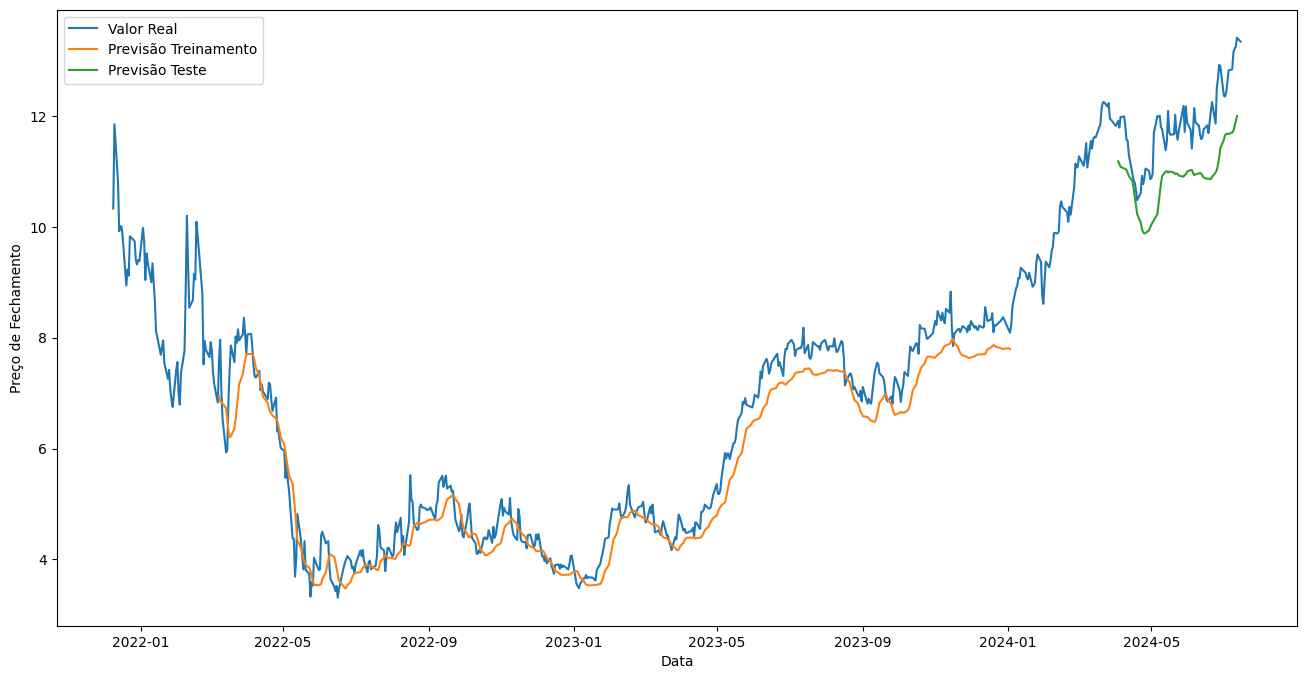

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(nu_data['Date'], scaler.inverse_transform(nu_data[['Close']]), label='Valor Real')


train_predict_plot = np.empty_like(nu_data['Close'])
train_predict_plot[:] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step] = train_predict.reshape(-1)

test_predict_plot = np.empty_like(nu_data['Close'])
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict) + (time_step*2) + 1:len(nu_data) - 1] = test_predict.reshape(-1)

plt.plot(nu_data['Date'], train_predict_plot, label='Prevision de Entrenamiento')
plt.plot(nu_data['Date'], test_predict_plot, label='Prevision de Teste')
plt.xlabel('Data')
plt.ylabel('precio de Cierre')
plt.legend()
plt.show()
